In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
elastic_net = pd.read_csv("./metrics/021_elastic_net.csv.zip")
lasso = pd.read_csv("./metrics/021_lasso.csv.zip")
linear_regression = pd.read_csv("./metrics/021_linear_regression.csv.zip")
logistic_regression = pd.read_csv("./metrics/021_logistic_regression.csv.zip")
random_forest = pd.read_csv("./metrics/021_random_forest.csv.zip")
decision_tree = pd.read_csv("./metrics/021_decision_tree.csv.zip")
mlp = pd.read_csv("./metrics/021_mlpr.csv.zip")
xgboost = pd.read_csv("./metrics/021_xgboost.csv.zip")

In [3]:
metrics = pd.concat([elastic_net,lasso,
                     linear_regression,logistic_regression,
                     random_forest,decision_tree,mlp,xgboost])

In [4]:
metrics.sort_values("r2",ascending=False,inplace=True)

In [5]:
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,Random Forest,0.566719,1.596250,5.029475,2.242649,4.538606e+12,2.972306,0.283788
0,XGBoost,0.544403,1.684812,5.288523,2.299679,1.622652e+13,0.351421,0.017921
0,MLP,0.463734,1.869787,6.224917,2.494978,3.951208e+13,42.546796,0.021900
0,Decision Tree,0.257171,1.716754,8.622680,2.936440,1.152848e+12,0.162924,0.008192
0,Linear Regression,0.160043,2.609468,9.750130,3.122520,8.656720e+13,0.337707,0.012007
0,Elastic Net,0.075604,2.920187,10.730293,3.275713,8.867742e+13,0.035531,0.013210
0,Lasso,0.032193,3.013027,11.234197,3.351745,8.871055e+13,0.047871,0.013998
0,Logistic Regression,-0.571548,2.570524,18.242353,4.271107,1.037563e+14,0.114714,0.010461


In [6]:
metrics.to_csv("./metrics/022_initial_metrics.csv.zip",index=False,compression="zip")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


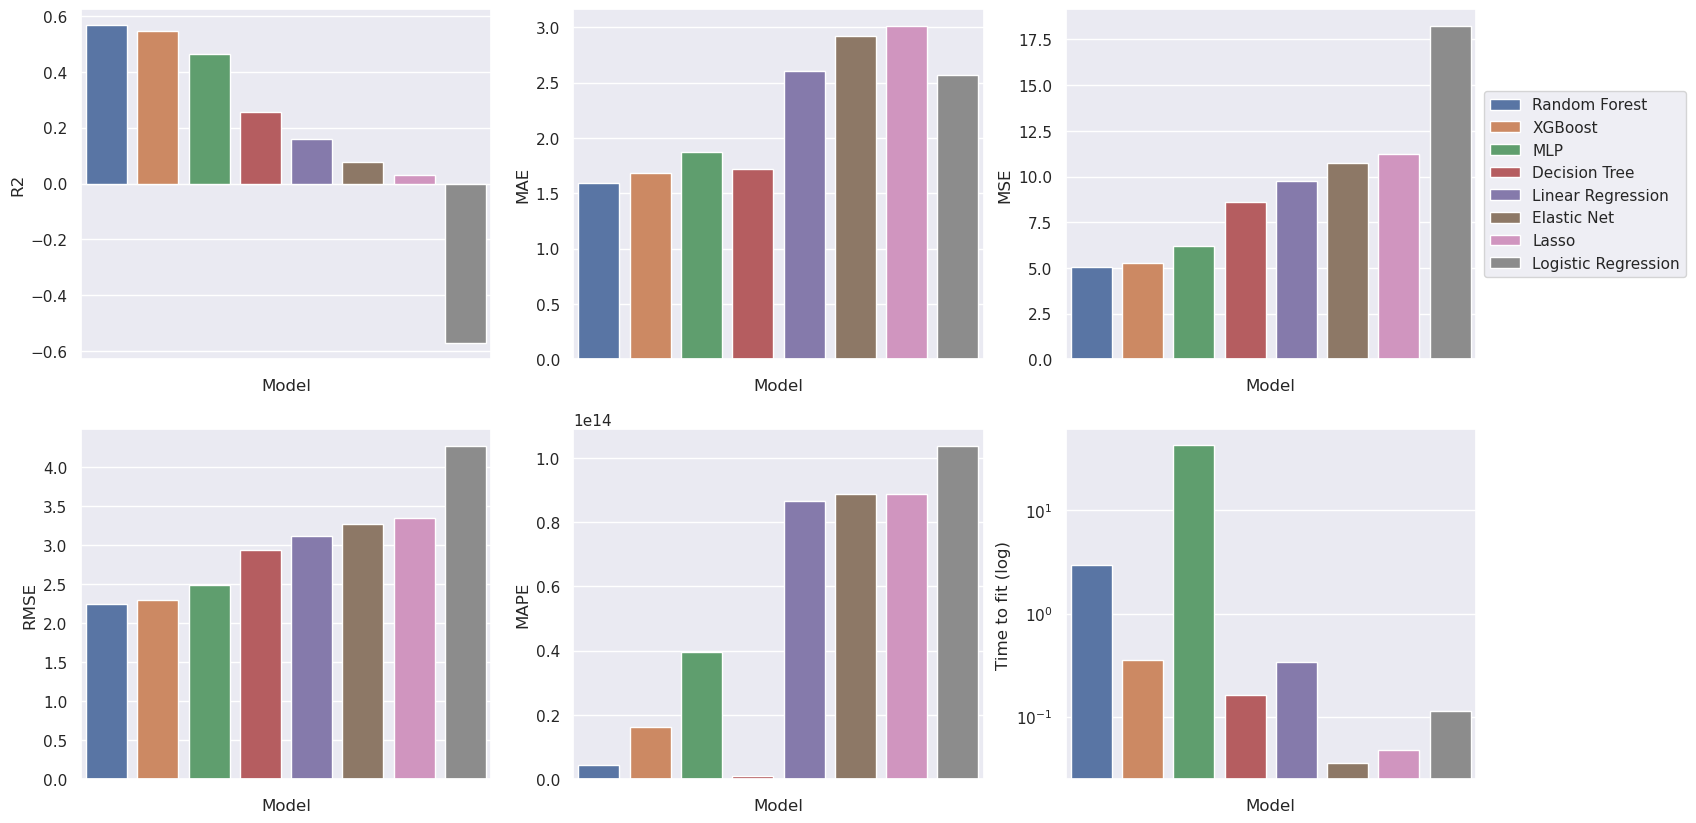

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)",yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/022_yonge_flow_only_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/022_yonge_flow_only_metrics.png",bbox_inches="tight")